In [76]:
##pip install antropy


In [84]:
import antropy as ant
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math

In [78]:
x = np.random.normal(size=3000)
print(ant.app_entropy(x))

2.005510831860045


In [79]:
data = pd.read_csv('C:/Users/iipa26/Downloads/Taxi.csv')
data = data.value
data = data.to_numpy()

In [80]:
print(data)

[12751  8767  7005 ... 14327 12060 10952]


In [81]:
print(ant.app_entropy(data))

0.6147633005601656


In [86]:
df = pd.read_csv('C:/Users/iipa26/Downloads/Taxi.csv')
app_ent = []
snr = []

# For window length from 1 to 20% of the data length, use SMA to smooth the data and then compute the kurtosis
for window_length in range(1, int(len(df) * 0.2)):
    df['value_sma'] = df['value'].rolling(window=window_length).mean()
    data = df.value_sma
    data = data.to_numpy()
    data = data[~np.isnan(data)]
    app_ent.append(ant.app_entropy(data))
    stdev = stats.stdev(data)
    if stdev == 0:
        snr.append(math.inf)
    else:
        snr.append(stats.mean(data) / stdev)

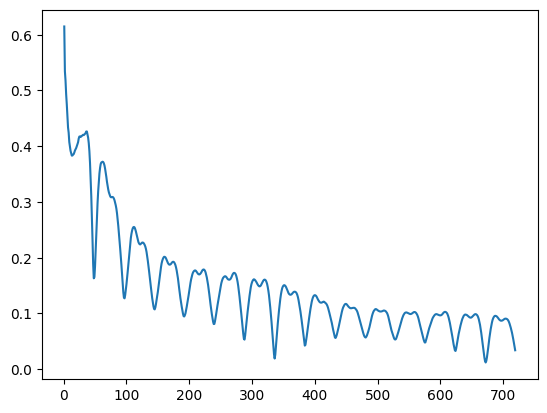

In [87]:
plt.plot(range(1, int(len(df) * 0.2)), app_ent)

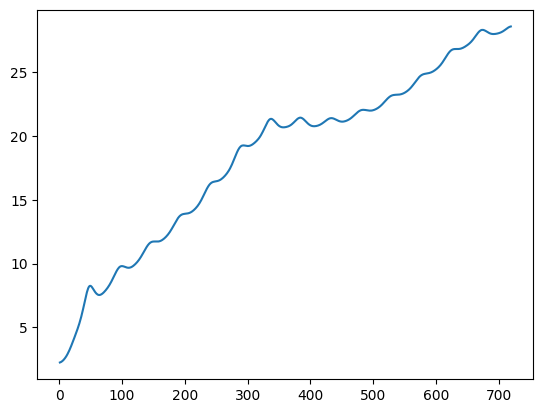

In [88]:
plt.plot(range(1, int(len(df) * 0.2)), snr)